# Evaluating Model Performance
We will evaluate and compare the performance of the models using the following metrics:
- Accuracy
- Precision
- Recall


In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd

In [2]:
os.chdir(r'C:\Users\david\projects\University\gemstone-classifier\src')

### Load the training results

In [10]:
results = {}
top_results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Top-3 Accuracy', 'Top-5 Accuracy'])

for dataset in os.listdir('../mod/'):
    for file in os.listdir(f'../mod/{dataset}/'):
        if file.endswith('.csv'):
            model = os.path.splitext(file)[0]
            print(f'Processing {model}...')
            history = pd.read_csv(f'../mod/{dataset}/{file}')
            results[model + ' ' + dataset] = history
            top_results = pd.concat([top_results, pd.DataFrame({'Model': model,
                                                                'Dataset': dataset,
                                                                'Accuracy': history['val_accuracy'].max(),
                                                                'Top-3 Accuracy': history['val_top_3_accuracy'].max(),
                                                                'Top-5 Accuracy': history['val_top_5_accuracy'].max()}, index=[0])])
top_results[top_results['Dataset'] == 'images_cropped_augmented_2000' ].sort_values(by='Accuracy', ascending=False)


Processing MobileNet...
Processing OwnModel...
Processing OwnModelRegularized...
Processing ResNet50...
Processing VGG16...
Processing MobileNet...
Processing VGG16...
Processing MobileNet...
Processing OwnModel...
Processing ResNet50...
Processing VGG16...
Processing MobileNet...
Processing OwnModel...
Processing ResNet50...
Processing VGG16...
Processing OwnModelRegularized...


C:\Users\david\AppData\Local\Temp\ipykernel_12960\2605250008.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_results = pd.concat([top_results, pd.DataFrame({'Model': model,


,Model,Dataset,Accuracy,Top-3 Accuracy,Top-5 Accuracy
0,OwnModel,images_cropped_augmented_2000,0.538392,0.830663,0.900718
0,VGG16,images_cropped_augmented_2000,0.514250,0.796970,0.876597
0,MobileNet,images_cropped_augmented_2000,0.447379,0.715229,0.808144
0,ResNet50,images_cropped_augmented_2000,0.212088,0.413109,0.538115


In [11]:
top_results[top_results['Dataset'] == 'first run_gempundit_2022_cropped_augmented_2000' ].sort_values(by='Accuracy', ascending=False)


,Model,Dataset,Accuracy,Top-3 Accuracy,Top-5 Accuracy
0,OwnModelRegularized,first run_gempundit_2022_cropped_augmented_2000,0.535529,0.837886,0.904374
0,OwnModel,first run_gempundit_2022_cropped_augmented_2000,0.505666,0.818385,0.892461
0,VGG16,first run_gempundit_2022_cropped_augmented_2000,0.502675,0.819698,0.890272
0,MobileNet,first run_gempundit_2022_cropped_augmented_2000,0.453283,0.746328,0.829718
0,ResNet50,first run_gempundit_2022_cropped_augmented_2000,0.305107,0.579304,0.701216


### Plot the metrics for each model over the epochs

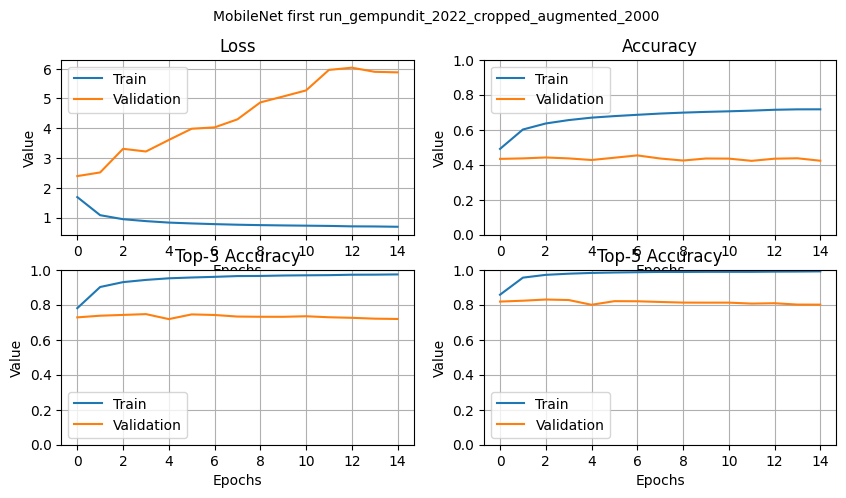

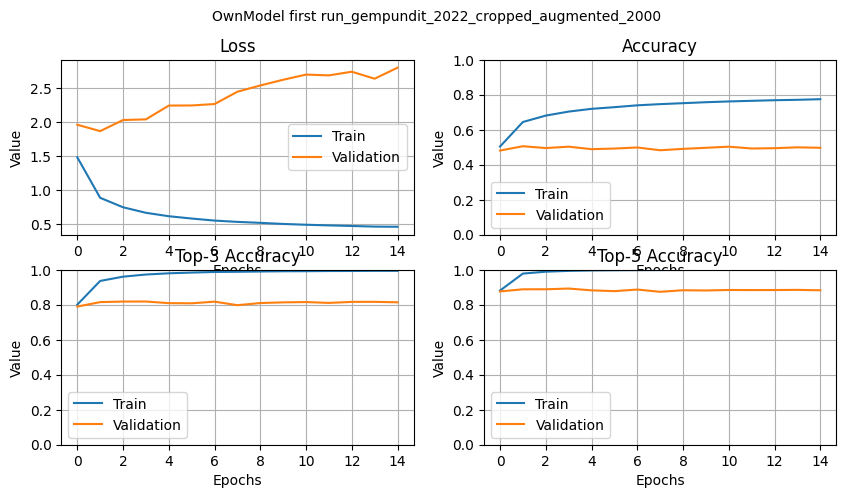

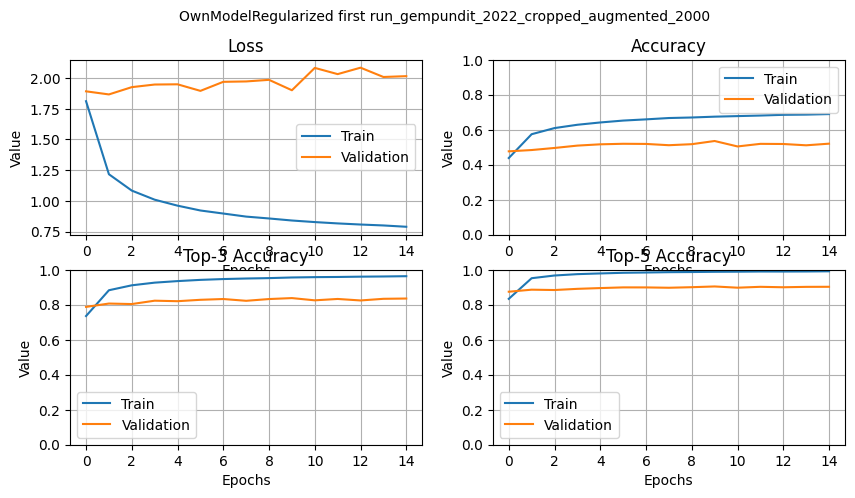

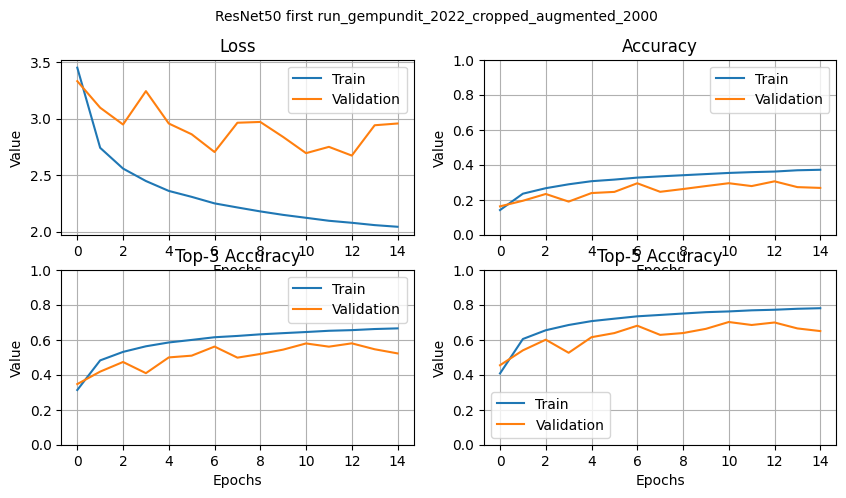

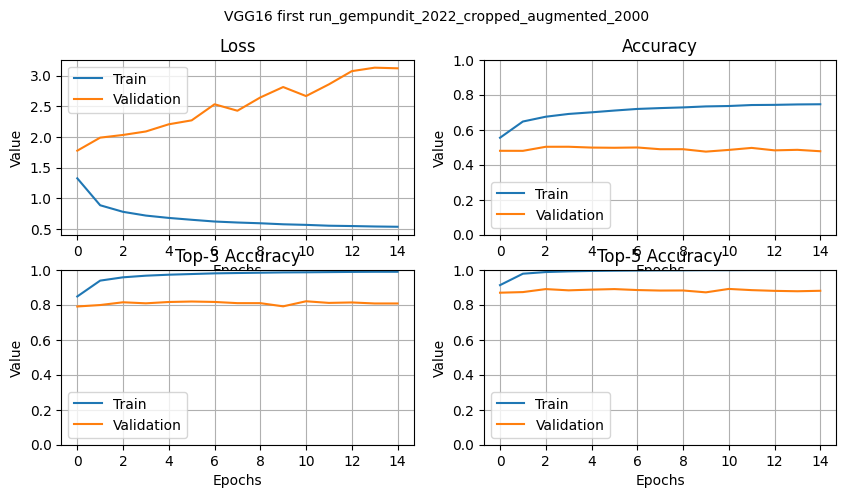

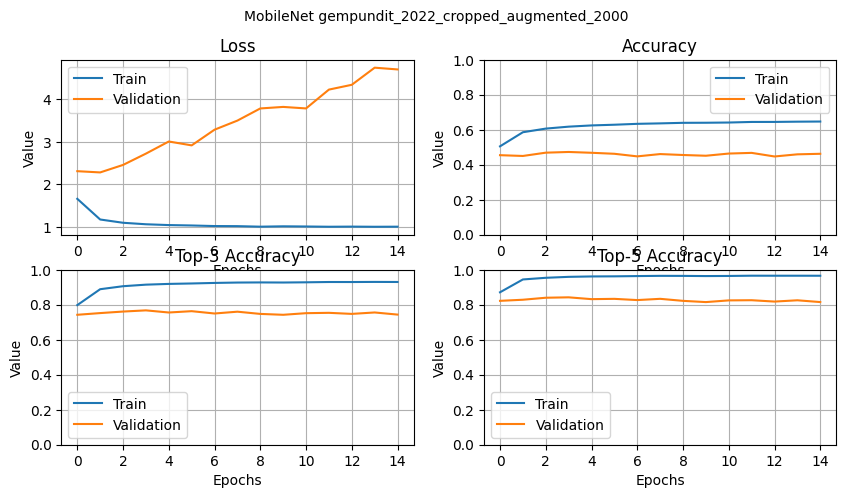

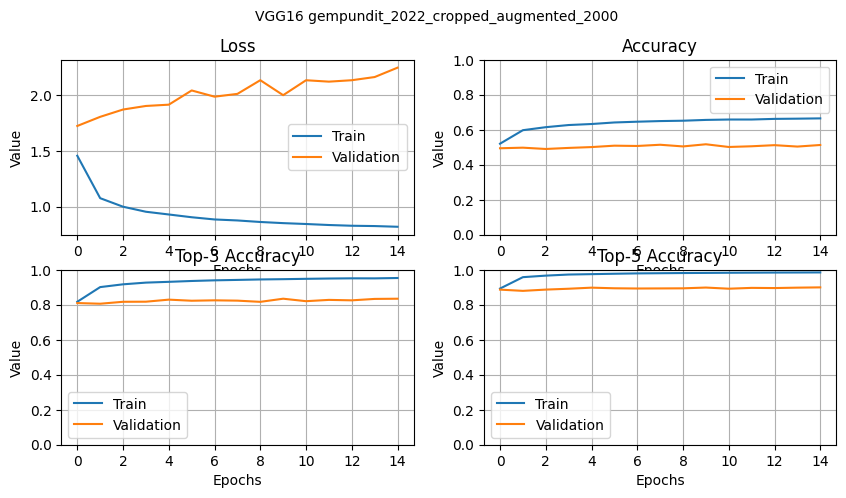

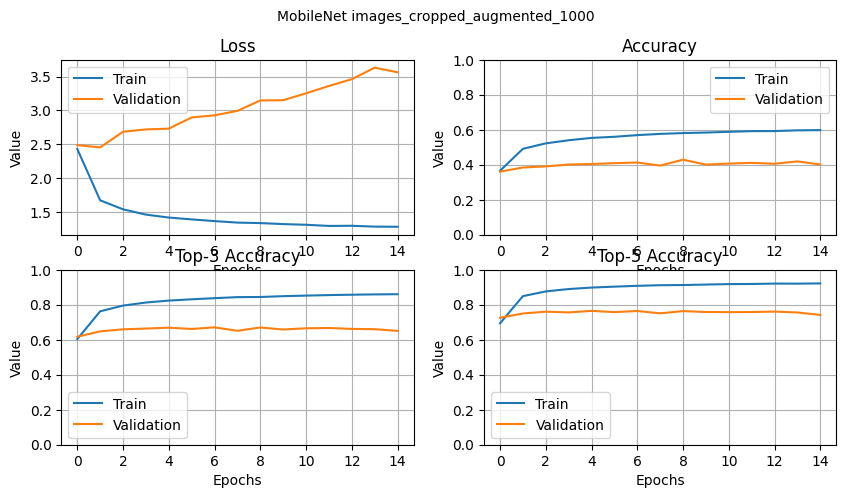

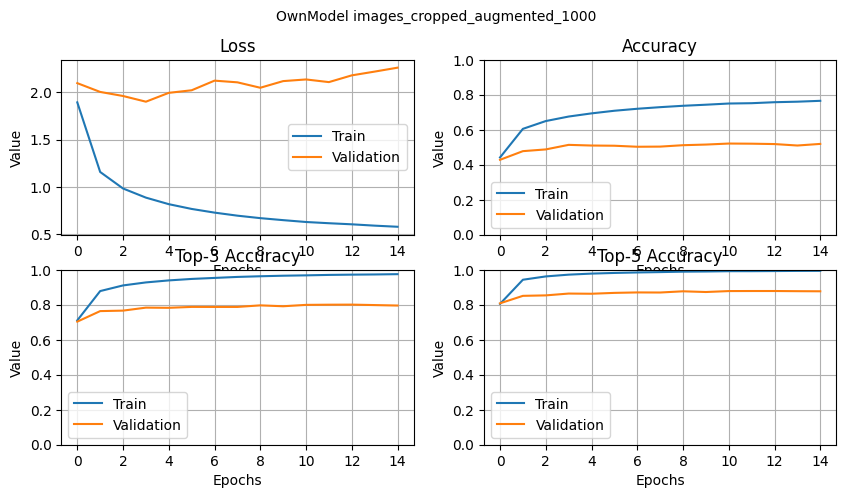

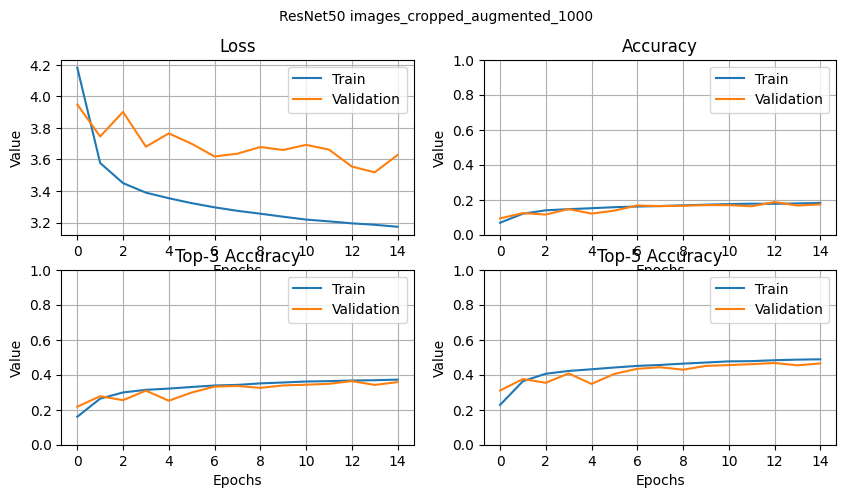

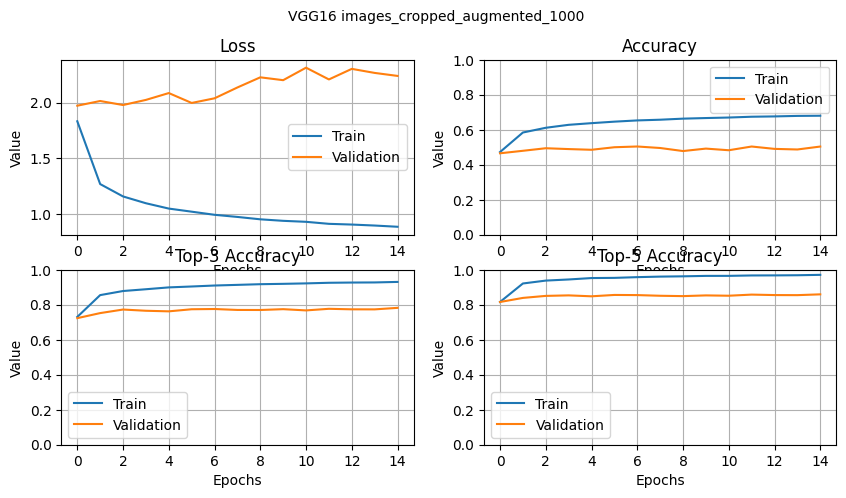

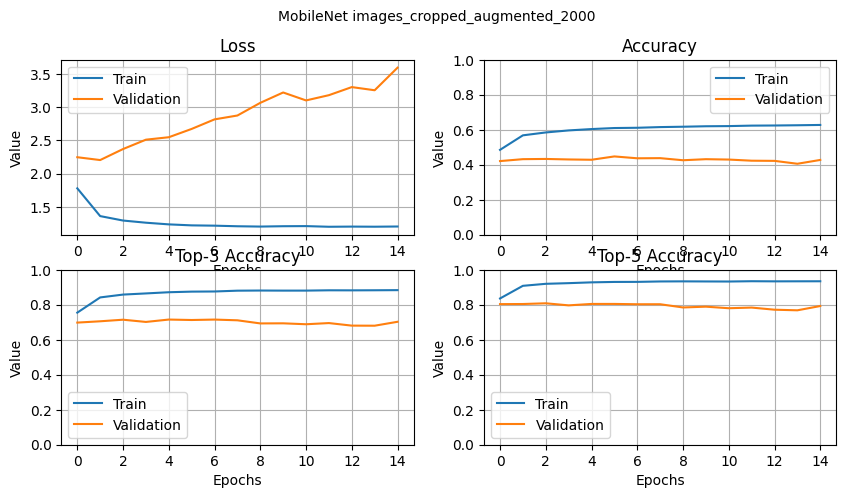

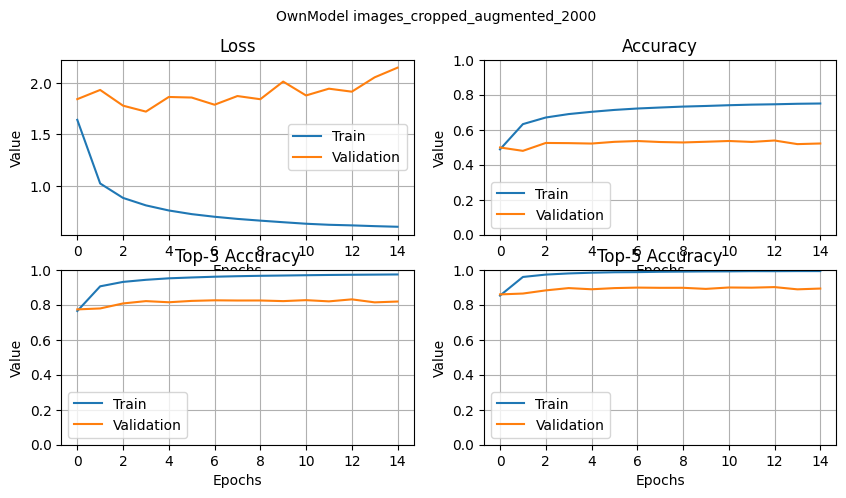

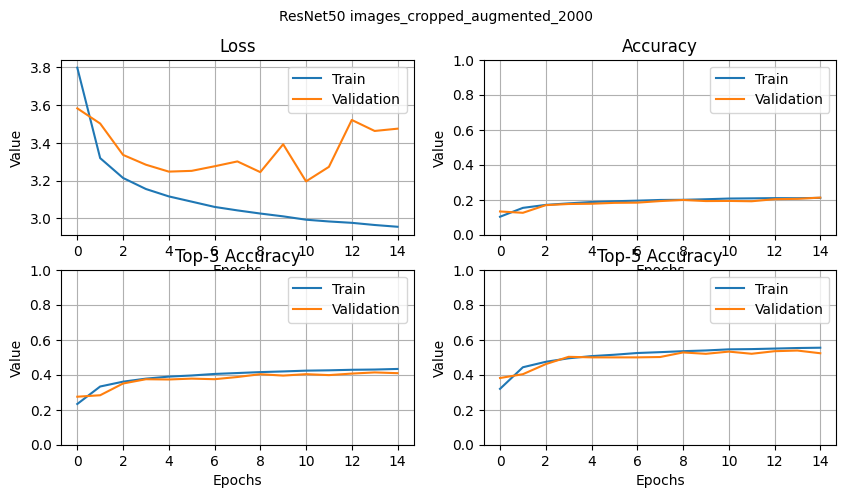

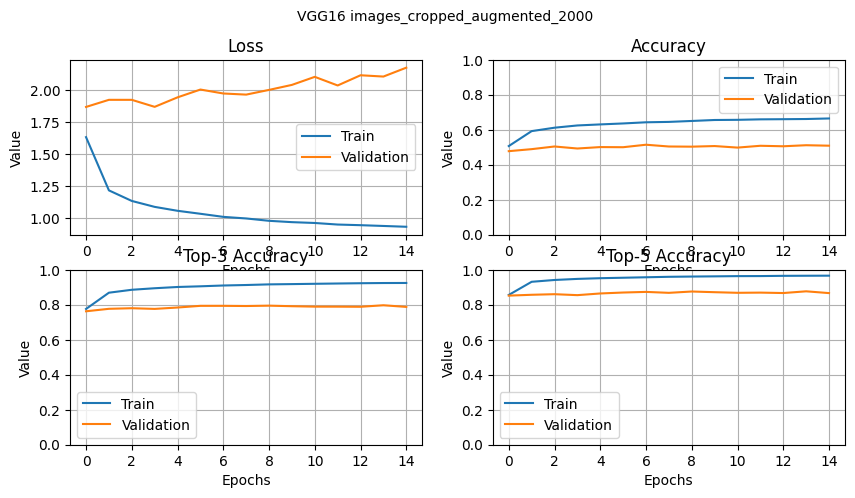

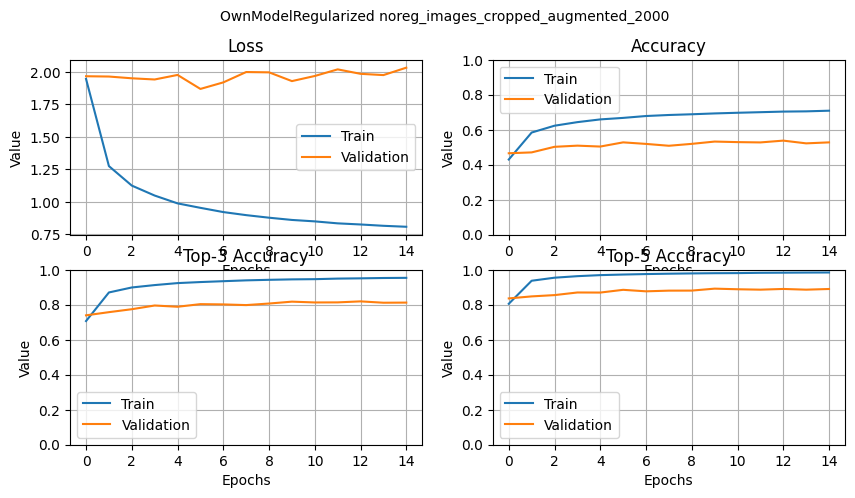

In [12]:
# Define a function to plot the metrics with adjusted y-axis limits for accuracy plots
def plot_metrics_adjusted(history, title):
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    fig.suptitle(title, fontsize=10)

    # Loss
    axs[0, 0].plot(history['loss'], label='Train')
    axs[0, 0].plot(history['val_loss'], label='Validation')
    axs[0, 0].set_title('Loss')
    axs[0, 0].legend()

    # Accuracy
    axs[0, 1].plot(history['accuracy'], label='Train')
    axs[0, 1].plot(history['val_accuracy'], label='Validation')
    axs[0, 1].set_title('Accuracy')
    axs[0, 1].set_ylim([0, 1])
    axs[0, 1].legend()

    # Top-3 Accuracy
    axs[1, 0].plot(history['top_3_accuracy'], label='Train')
    axs[1, 0].plot(history['val_top_3_accuracy'], label='Validation')
    axs[1, 0].set_title('Top-3 Accuracy')
    axs[1, 0].set_ylim([0, 1])
    axs[1, 0].legend()

    # Top-5 Accuracy
    axs[1, 1].plot(history['top_5_accuracy'], label='Train')
    axs[1, 1].plot(history['val_top_5_accuracy'], label='Validation')
    axs[1, 1].set_title('Top-5 Accuracy')
    axs[1, 1].set_ylim([0, 1])
    axs[1, 1].legend()

    for ax in axs.flat:
        ax.set(xlabel='Epochs', ylabel='Value')
        ax.grid()

for model, history in results.items():
    plot_metrics_adjusted(history, model)


### Compare the models for the used Top-K-Accuracy

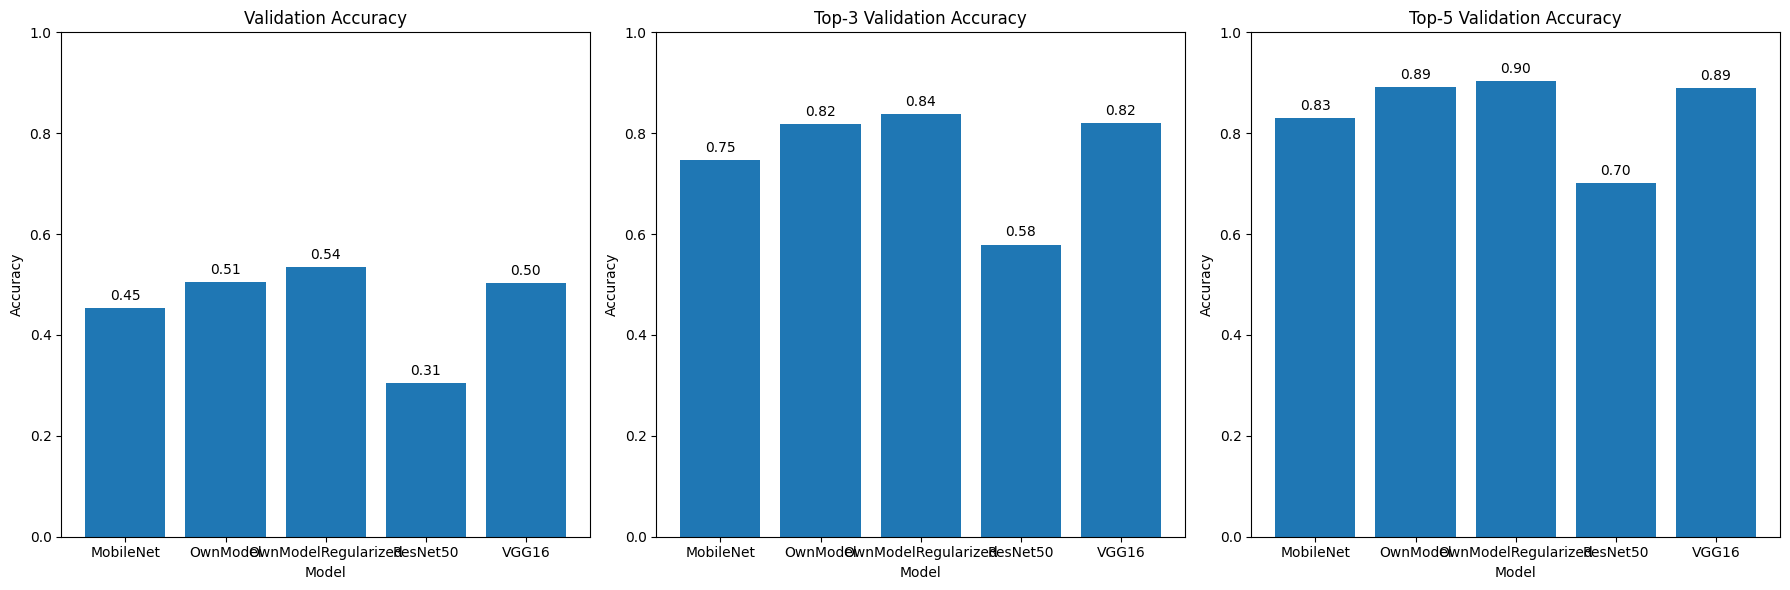

In [5]:
# Function to create bar plots for each Top-k accuracy
def create_bar_plot(y_values, title, y_label, ax):
    ax.bar(top_results['Model'], y_values)
    ax.set_title(title)
    ax.set_ylim([0, 1])
    ax.set_xlabel('Model')
    ax.set_ylabel(y_label)
    for i, v in enumerate(y_values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy plot
create_bar_plot(top_results['Accuracy'], 'Validation Accuracy', 'Accuracy', axs[0])

# Top-3 Accuracy plot
create_bar_plot(top_results['Top-3 Accuracy'], 'Top-3 Validation Accuracy', 'Accuracy', axs[1])

# Top-5 Accuracy plot
create_bar_plot(top_results['Top-5 Accuracy'], 'Top-5 Validation Accuracy', 'Accuracy', axs[2])

plt.tight_layout()
plt.show()

### Compare the models for the different metrics over the epochs

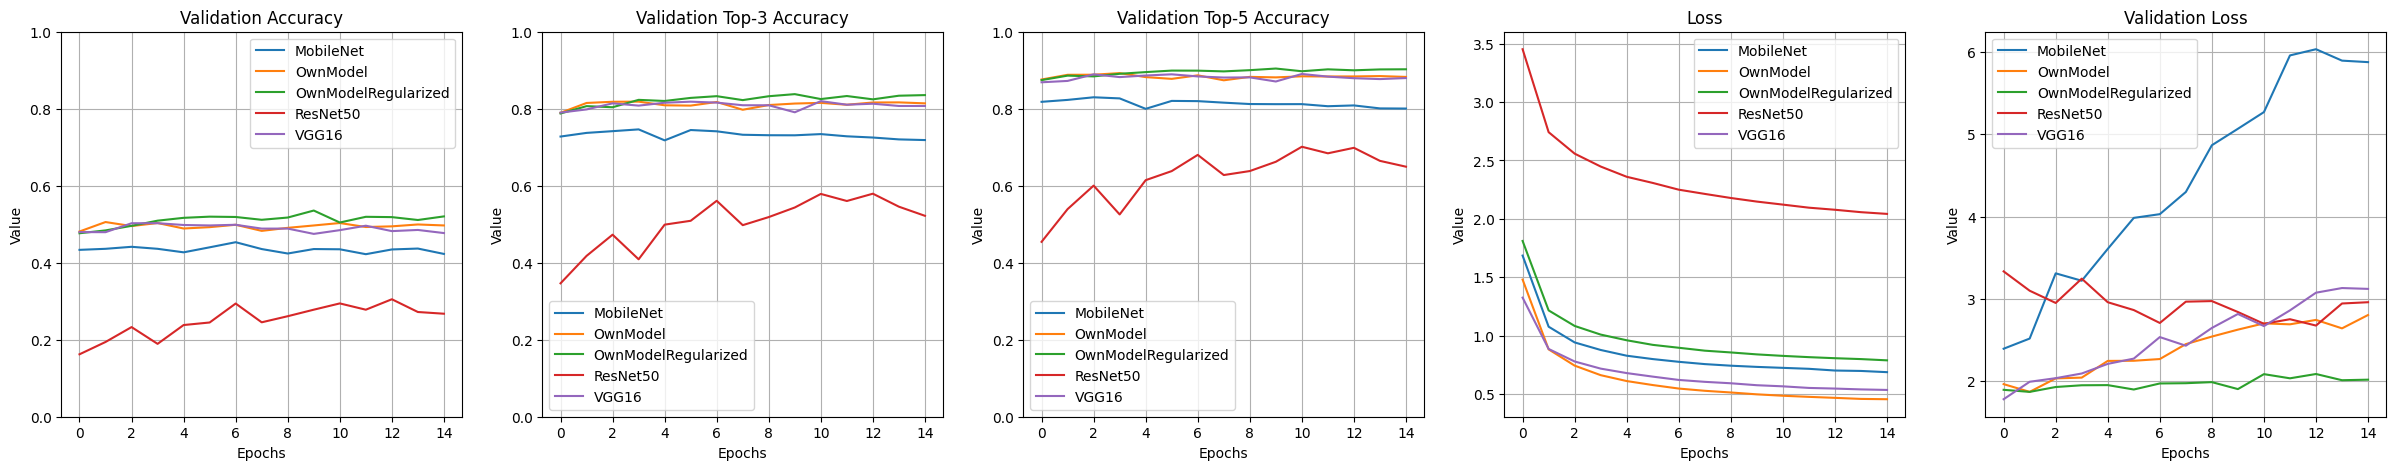

In [6]:
def plot_combined_metrics(histories, titles):
    fig, axs = plt.subplots(1, 5, figsize=(30, 5))
    
    # Iterate over each metric and plot for all models
    for i, metric in enumerate(['val_accuracy', 'val_top_3_accuracy', 'val_top_5_accuracy', 'loss', 'val_loss']):
        for model_name, history in histories.items():
            # For accuracy metrics, plot validation only
            axs[i].plot(history[f'{metric}'], label=f'{model_name}')
        
        axs[i].set_title(f'{titles[i]}')
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel('Value')
        if 'accuracy' in metric:
            axs[i].set_ylim([0, 1])
        axs[i].legend()
        axs[i].grid()

plot_combined_metrics(results, ['Validation Accuracy', 'Validation Top-3 Accuracy', 'Validation Top-5 Accuracy', 'Loss', 'Validation Loss'])

## Evaluate by running model, obsolete?

In [7]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', normalize=False, cmap=plt.cm.Blues, figsize=(10,  10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=12)  # Increase font size
    plt.yticks(tick_marks, classes, size=12)  # Increase font size

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() /  2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, int(cm[i, j]),  # Cast to int to avoid decimal points
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 size=12)  # Increase font size

    plt.tight_layout()
    plt.ylabel('True label', size=14)  # Increase font size
    plt.xlabel('Predicted label', size=14)  # Increase font size
    plt.show()

# Function to load a model
def load_model(model_path):
    return keras.models.load_model(model_path)

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
models_path = r'C:\Users\david\projects\University\gemstone-classifier\mod\first run_gempundit_2022_cropped_augmented_2000'
data_dir = r'C:\Users\david\projects\University\gemstone-classifier\dat\gempundit_2022_cropped_augmented_2000'

models = []
for file in os.listdir(os.path.normpath(models_path)):
    if file.endswith('.h5'):
        models.append(file)

# Parameters (replace these with your values)
target_size = (224, 224)  # Example target size
batch_size = 32
validation_split = 0.2

# Image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

# Load data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False  # Important for evaluation
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for evaluation
)

# Evaluate the model
val_steps = val_data.samples // batch_size

true_classes = val_data.classes
true_classes = true_classes[:val_steps * batch_size]  # Aligning the true labels length with the prediction length

index_to_class = {v: k for k, v in val_data.class_indices.items()}

results = {}
for model_name in models:
    print(f'Processing {model_name}...')
    model = load_model(models_path + '/' + model_name)

    predictions = model.predict(val_data, steps=val_steps)

    predicted_probs = predictions[:len(true_classes)]  # Aligning the prediction length with true labels
    predicted_labels = np.argmax(predicted_probs, axis=1)

    results[model_name] = {
        'predicted_probs': predicted_probs,
        'predicted_labels': predicted_labels
    }


Found 164657 images belonging to 99 classes.
Found 41150 images belonging to 99 classes.
Processing <keras.engine.sequential.Sequential object at 0x0000029BF6E82710>...
1285/1285 [==============================] - 44s 34ms/step
Processing <keras.engine.sequential.Sequential object at 0x0000029D95DC2B90>...
1285/1285 [==============================] - 41s 32ms/step
Processing <keras.engine.sequential.Sequential object at 0x0000029D95E72E30>...
1285/1285 [==============================] - 117s 90ms/step
Processing <keras.engine.sequential.Sequential object at 0x0000029D98DDDAE0>...
1285/1285 [==============================] - 104s 81ms/step


### Calculate Top-K-Accuracy

In [22]:
# Custom function to calculate top-k accuracy
def top_k_accuracy(true_labels, pred_labels, k):
    top_k_preds = np.argsort(pred_labels, axis=1)[:, -k:]
    match_array = np.any(top_k_preds == np.array(true_labels)[:, None], axis=1)
    top_k_accuracy = np.mean(match_array)
    return top_k_accuracy


top_k_acc = {}
for model, result in results.items():
    predicted_probs = result['predicted_probs']
    predicted_labels = result['predicted_labels']
    top_k_acc[model] = {}
    for k in [1, 3, 5]:
        ac = top_k_accuracy(true_classes, predicted_probs, k)
        top_k_acc[model][f'top_{k}_accuracy'] = ac

In [23]:
print(top_k_acc)

{'OwnModel.h5': {'top_1_accuracy': 0.4970817120622568, 'top_3_accuracy': 0.8138618677042802, 'top_5_accuracy': 0.8825875486381323}, 'OwnModelRegularized.h5': {'top_1_accuracy': 0.5205982490272374, 'top_3_accuracy': 0.8352626459143969, 'top_5_accuracy': 0.9023832684824903}, 'ResNet50.h5': {'top_1_accuracy': 0.2676070038910506, 'top_3_accuracy': 0.5215466926070039, 'top_5_accuracy': 0.6491488326848249}, 'VGG16.h5': {'top_1_accuracy': 0.4772130350194553, 'top_3_accuracy': 0.806955252918288, 'top_5_accuracy': 0.8795963035019455}}


### Per class IoU

In [31]:
k = 10

num_classes = np.max(true_classes) + 1  # Assuming class labels are 0-indexed
for model, result in results.items():
    ious = []
    predicted_labels = result['predicted_labels']
    for class_id in range(num_classes):
        TP = np.sum((predicted_labels == class_id) & (true_classes == class_id))
        FP = np.sum((predicted_labels == class_id) & (true_classes != class_id))
        FN = np.sum((predicted_labels != class_id) & (true_classes == class_id))
        iou = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
        ious.append(iou)
    # Convert ious to a numpy array if it's not already
    ious_array = np.array(ious)

    # # Get indices of the top-5 IoU scores
    # top_k_indices = np.argsort(ious_array)[-k:][::-1]  # This sorts in ascending order, so we reverse it
    # last_k_indices = np.argsort(ious_array)[:k]

    # # Get the top-5 IoU scores
    # top_k_ious = ious_array[top_k_indices]
    # last_k_ious = ious_array[last_k_indices]

    # top_k_class_names = [index_to_class[i] for i in top_k_indices]
    # last_k_class_names = [index_to_class[i] for i in last_k_indices]

    results[model]['ious'] = ious_array


#### Top-K IoU Score

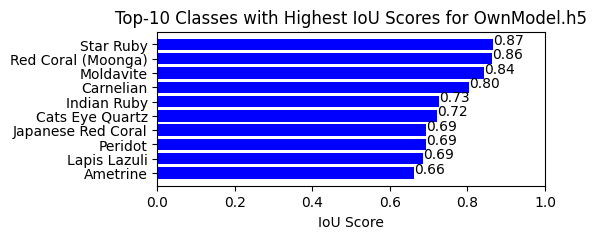

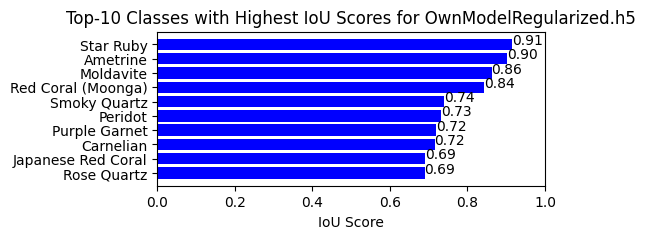

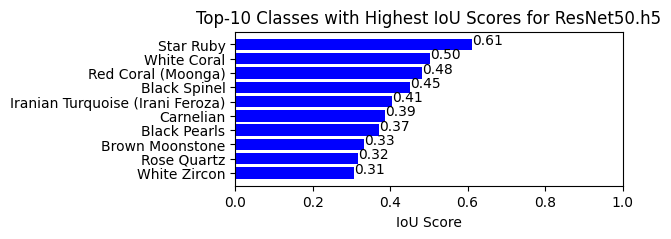

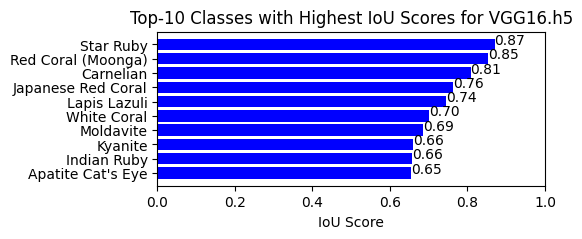

In [35]:
for i, (model, result) in enumerate(results.items()):
    top_k_indices = np.argsort(result['ious'])[-k:][::-1]
    top_k_ious = result['ious'][top_k_indices]
    top_k_class_names = [index_to_class[i] for i in top_k_indices]
    plt.figure(figsize=(5, 2))
    plt.barh(top_k_class_names, top_k_ious, color='blue')
    # show the values on the bars
    for index, value in enumerate(top_k_ious):
        plt.text(value, index, f'{value:.2f}', ha='left', size=10)
    plt.xlabel('IoU Score')
    plt.xlim([0, 1])
    plt.title(f'Top-{k} Classes with Highest IoU Scores for {model}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
    plt.show()

### Least-K-IoUs

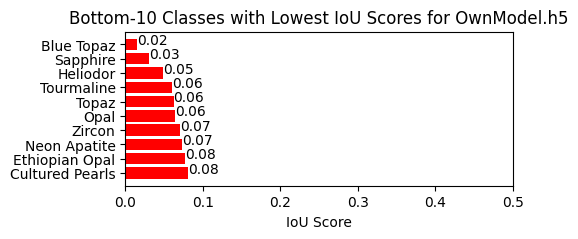

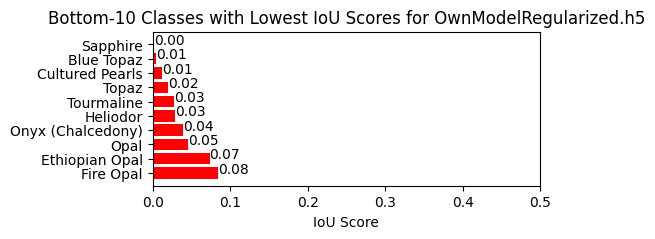

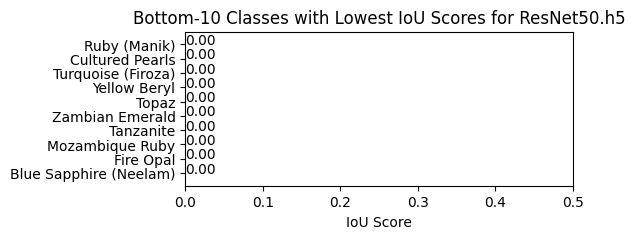

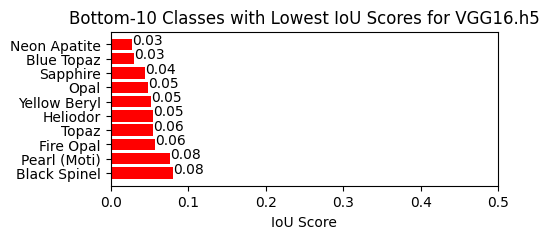

In [37]:
for i, (model, result) in enumerate(results.items()):
    last_k_indices = np.argsort(result['ious'])[:k]
    last_k_ious = result['ious'][last_k_indices]
    last_k_class_names = [index_to_class[i] for i in last_k_indices]

    plt.figure(figsize=(5, 2))
    plt.barh(last_k_class_names, last_k_ious, color='red')
    # show the values on the bars
    for index, value in enumerate(last_k_ious):
        plt.text(value, index, f'{value:.2f}', ha='left', size=10)
    plt.xlabel('IoU Score')
    plt.xlim([0, 0.5])
    plt.title(f'Bottom-{k} Classes with Lowest IoU Scores for {model}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
    plt.show()    

#### All IoUs sorted

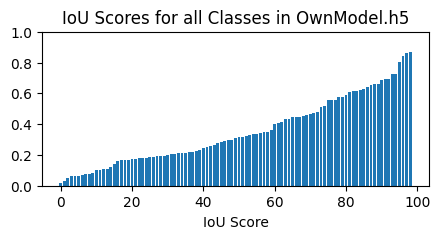

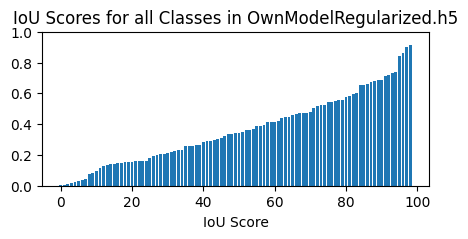

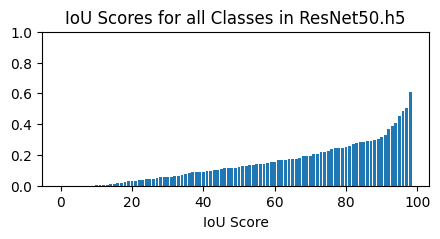

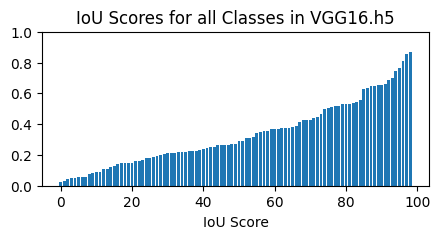

In [40]:
for i, (model, result) in enumerate(results.items()):
    plt.figure(figsize=(5, 2))
    plt.bar(list(range(len(result['ious']))), result['ious'][np.argsort(result['ious'])])
    plt.xlabel('IoU Score')
    plt.ylim([0, 1])
    plt.title(f'IoU Scores for all Classes in {model}')
    plt.show()

### Precision Obsolete?

In [45]:
import numpy as np
import matplotlib.pyplot as plt

num_classes = np.max(true_classes) + 1  # Assuming class labels are 0-indexed
# Parameters for top-k and last-k
k = 10

for model, result in results.items():
    predicted_labels = result['predicted_labels']
    precisions = []
    for class_id in range(num_classes):
        TP = np.sum((predicted_labels == class_id) & (true_classes == class_id))
        FP = np.sum((predicted_labels == class_id) & (true_classes != class_id))
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        precisions.append(precision)

    # Convert precisions to a numpy array if it's not already
    precisions_array = np.array(precisions)

    results[model]['precisions'] = precisions_array


# # Get indices of the top-k and last-k precision scores
# top_k_indices = np.argsort(precisions_array)[-k:][::-1]  # Top-k
# last_k_indices = np.argsort(precisions_array)[:k]  # Last-k

# # Get the top-k and last-k precision scores
# top_k_precisions = precisions_array[top_k_indices]
# last_k_precisions = precisions_array[last_k_indices]

# # Get the class names for the top-k and last-k
# top_k_class_names = [index_to_class[index] for index in top_k_indices]
# last_k_class_names = [index_to_class[index] for index in last_k_indices]

# # Creating the bar plot for the top-k classes
# plt.figure(figsize=(10, 6))
# plt.bar(top_k_class_names, top_k_precisions, color='green')
# plt.xlabel('Class')
# plt.ylabel('Precision Score')
# plt.ylim([0, 1])
# plt.title('Top-10 Classes by Precision Score')
# plt.xticks(rotation=45)
# plt.show()

# # Creating the bar plot for the last-k classes
# plt.figure(figsize=(10, 6))
# plt.bar(last_k_class_names, last_k_precisions, color='red')
# plt.xlabel('Class')
# plt.ylabel('Precision Score')
# plt.ylim([0, 1])
# plt.title('Bottom-10 Classes by Precision Score')
# plt.xticks(rotation=45)
# plt.show()

# # Creating the bar plot for all classes
# plt.figure(figsize=(10, 6))
# plt.bar(list(range(len(precisions_array))), precisions_array[np.argsort(precisions_array)])
# plt.xlabel('Class')
# plt.ylabel('Precision Score')
# plt.ylim([0, 1])
# plt.title('Sorted per-class Precision Score')
# plt.show()


#### Top-K-Precision

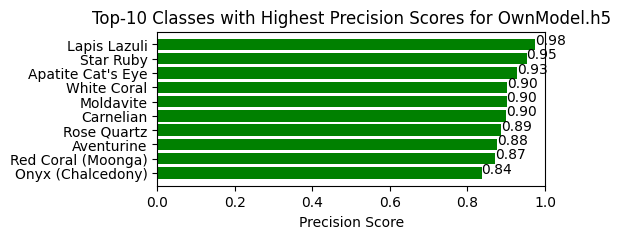

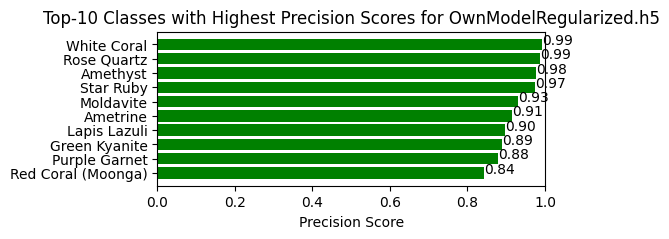

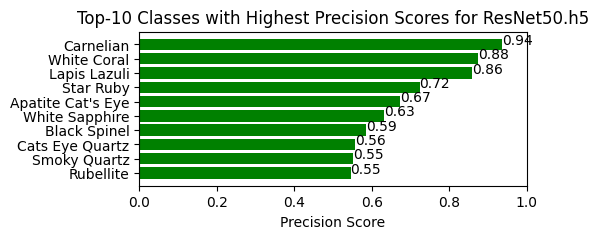

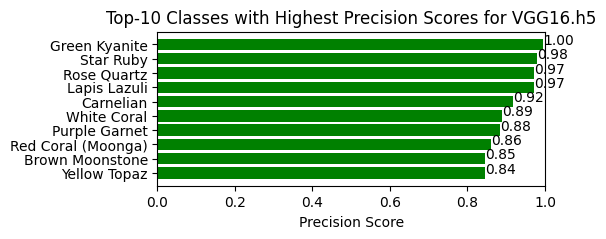

In [46]:
for i, (model, result) in enumerate(results.items()):
    top_k_indices = np.argsort(result['precisions'])[-k:][::-1]
    top_k_precisions = result['precisions'][top_k_indices]
    top_k_class_names = [index_to_class[i] for i in top_k_indices]
    plt.figure(figsize=(5, 2))
    plt.barh(top_k_class_names, top_k_precisions, color='green')
    # show the values on the bars
    for index, value in enumerate(top_k_precisions):
        plt.text(value, index, f'{value:.2f}', ha='left', size=10)
    plt.xlabel('Precision Score')
    plt.xlim([0, 1])
    plt.title(f'Top-{k} Classes with Highest Precision Scores for {model}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
    plt.show()

#### Botton-K-Precicion

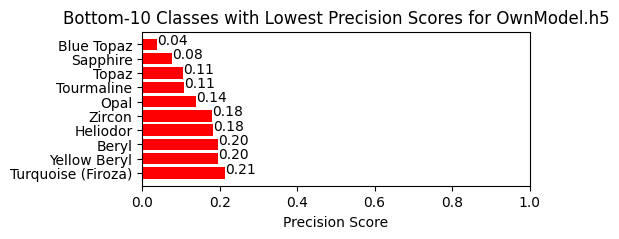

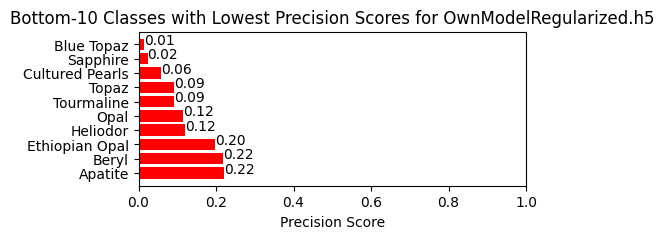

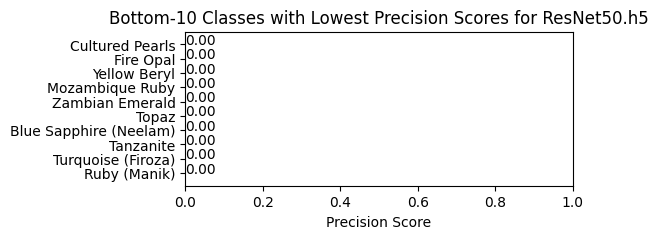

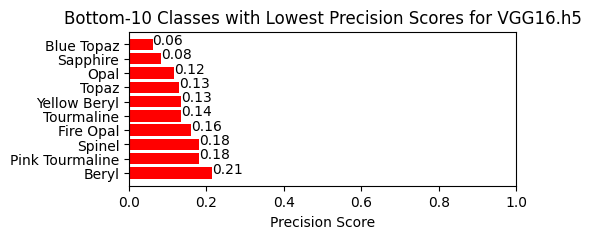

In [47]:
for i, (model, result) in enumerate(results.items()):
    bottom_k_indices = np.argsort(result['precisions'])[:k]
    bottom_k_precisions = result['precisions'][bottom_k_indices]
    bottom_k_class_names = [index_to_class[i] for i in bottom_k_indices]
    plt.figure(figsize=(5, 2))
    plt.barh(bottom_k_class_names, bottom_k_precisions, color='red')
    # show the values on the bars
    for index, value in enumerate(bottom_k_precisions):
        plt.text(value, index, f'{value:.2f}', ha='left', size=10)
    plt.xlabel('Precision Score')
    plt.xlim([0, 1])
    plt.title(f'Bottom-{k} Classes with Lowest Precision Scores for {model}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
    plt.show()
    

### What was misclassified as what?

In [66]:
from sklearn.metrics import confusion_matrix
import numpy as np

data_path = r'C:\Users\david\projects\University\gemstone-classifier\dat\gempundit_2022'
predicted_labels = results['OwnModelRegularized.h5']['predicted_labels']
last_k_indices = np.argsort(results['OwnModelRegularized.h5']['ious'])[:k]

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_labels)


for class_id in last_k_indices:
    class_row = cm[class_id, :].copy()
    class_row[class_id] = 0  # Zero out the diagonal
    
    number_of_misclassifications = np.sum(class_row)
    
    # Most common misclassification
    most_common_misclassified_as = np.argmax(class_row)
    most_common_count = class_row[most_common_misclassified_as]
    most_common_percentage_misclassified = round(most_common_count / number_of_misclassifications * 100, 1)
    
    # Second most common misclassification
    class_row[most_common_misclassified_as] = 0  # Zero out the most common
    second_most_common_misclassified_as = np.argmax(class_row)
    second_most_common_count = class_row[second_most_common_misclassified_as]
    second_most_common_percentage_misclassified = round(second_most_common_count / number_of_misclassifications * 100, 1)
    
    image_count = len(os.listdir(os.path.join(data_path, index_to_class[class_id])))
    
    # Print results
    print(f"Class '{index_to_class[class_id]}' misclassified {most_common_percentage_misclassified}% as '{index_to_class[most_common_misclassified_as]}' and {second_most_common_percentage_misclassified}% as '{index_to_class[second_most_common_misclassified_as]}'.")

Class 'Sapphire' misclassified 30.6% as 'CVN15J~1' and 20.6% as 'Blue Sapphire (Neelam)'.
Class 'Blue Topaz' misclassified 68.8% as 'Swiss Blue Topaz' and 8.1% as 'London Blue Topaz'.
Class 'Cultured Pearls' misclassified 73.4% as 'South Sea Pearls' and 15.5% as 'Pearl (Moti)'.
Class 'Topaz' misclassified 53.1% as 'Swiss Blue Topaz' and 5.1% as 'Golden Topaz'.
Class 'Tourmaline' misclassified 29.4% as 'Green Tourmaline (Verdelite)' and 7.8% as 'Alexandrite'.
Class 'Heliodor' misclassified 48.0% as 'Beryl' and 27.4% as 'Yellow Beryl'.
Class 'Onyx (Chalcedony)' misclassified 73.6% as 'Black Onyx' and 10.7% as 'Black Spinel'.
Class 'Opal' misclassified 40.3% as 'Australian Opal' and 19.1% as 'Black Opal'.
Class 'Ethiopian Opal' misclassified 51.4% as 'Black Opal' and 20.9% as 'Opal'.
Class 'Fire Opal' misclassified 74.8% as 'Mexican Fire Opal' and 3.9% as 'Japanese Red Coral'.
